In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn

import pybrain

%matplotlib inline

In [2]:
mnist = np.loadtxt("../data/mnist_train.csv", delimiter=",", skiprows=1, dtype=int)

In [3]:
X = mnist[:, 1:] / 255.0
y = mnist[:, 0].astype(np.uint8)

from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split

ohe = OneHotEncoder(n_values=10, sparse=False)
y = ohe.fit_transform(y.reshape((mnist.shape[0], 1)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25)

y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [5]:
from pybrain.datasets import SupervisedDataSet

ds = SupervisedDataSet(28*28, 10)

In [6]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure import TanhLayer
from pybrain.structure import SoftmaxLayer

net = buildNetwork(28 * 28, 100, 10, bias=True, hiddenclass=TanhLayer, outclass = SoftmaxLayer)

In [7]:
ds.clear()
for i in range(X_train.shape[0]):
    ds.addSample(X_train[i, :], y_train[i, :])

In [8]:
from pybrain.supervised.trainers import BackpropTrainer

trainer = BackpropTrainer(net, ds)
trainer.train()

0.019419914191430139

In [9]:
y_predicted = np.ndarray(shape=(y_test.shape[0]), dtype=int)

for i in range(y_test.shape[0]):
    y_predicted[i] = np.argmax(net.activate(X_test[i, :]))

0.842023809524


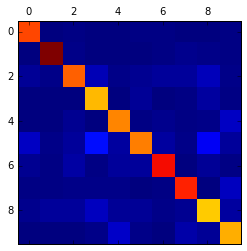

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

print accuracy_score(y_predicted, np.argmax(y_test, axis=1))
cm = confusion_matrix(y_predicted, np.argmax(y_test, axis=1))

plt.matshow(cm)